In [105]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation

# Classical 2d Ising model
\begin{equation}
H = -J\sum_{\langle i, j \rangle} S_i S_j
\end{equation}
where $S_i = \pm 1$. 

## Define Hamiltonian
(Here, we assume the periodic boundary conditions)

In [22]:
J = 1.
def H(S):
    # S is a matrix describing the spin config
    h = S.shape[0]
    w = S.shape[1]
    perm_r = [-1] + [i for i in range(h-1)]
    perm_c = [-1] + [i for i in range(w-1)]
    return -J*(np.sum(np.multiply(S, S[perm_r, :]) + np.sum(np.multiply(S, S[:, perm_c]))))
               

## MC(metropolis algorithm) to compute the GS

In [134]:
k = 1.
def MC(S, T):
    h = S.shape[0]
    w = S.shape[1]
    cost = -0.1
    for i in range(h*w*100):
        i = np.random.randint(w); j = np.random.randint(h)
        s = S[i, j]
        gap = 2*s*(S[(i+1)%h, j] + S[i, (j+1)%w] + S[(i-1)%h, j] + S[i, (j-1)%w])
        if gap < 0 or np.random.rand() < np.exp(-gap/(k*T)):
            S[i, j] *= -1
    return S

## Let's see the magnetization vs. T to observe the phase transition

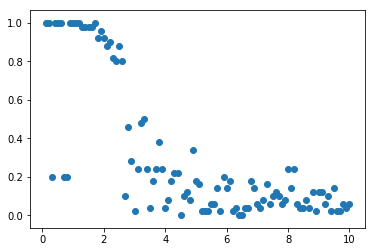

In [135]:
# Lattice Config
w = 10
h = 10

Ts =  np.linspace(0.1, 10, 100)
Gs_list = [MC(np.random.randint(2, size=(w, h))*2-1, T)/(w*h) for T in Ts]
mg_list = [np.abs(np.sum(gs)) for gs in Gs_list]
plt.scatter(Ts, mg_list)
plt.show()

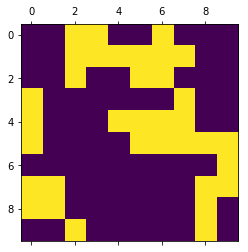

In [116]:
data = np.empty(50, dtype=object)

fig = plt.figure()
plot =plt.matshow(Gs_list[30], fignum=0)

def init():
    plot.set_data(Gs_list[30])
    return plot

def update(j):
    plot.set_data(Gs_list[j])
    return [plot]


anim = FuncAnimation(fig, update, init_func = init, frames=50, interval = 100)

plt.show()

In [117]:
from IPython.display import HTML
HTML(anim.to_jshtml())

## Triangular Lattice

In [150]:
k = 1.
def MC_tri(S, T):
    h = S.shape[0]
    w = S.shape[1]
    cost = -0.1
    for i in range(h*w*100):
        i = np.random.randint(w); j = np.random.randint(h)
        s = S[i, j]
        gap = 2*s*(S[(i+1)%h, j] + S[i, (j+1)%w] + S[(i-1)%h, j] + S[i, (j-1)%w] + S[(i+1)%h, (j+1)%w] + S[(i-1)%h, (j-1)%w])
        if gap < 0 or np.random.rand() < np.exp(-gap/(k*T)):
            S[i, j] *= -1
    return S

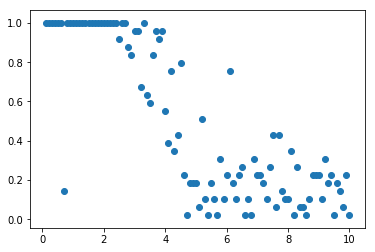

In [151]:
# Lattice Config
w = 7
h = 7

Ts =  np.linspace(0.1, 10, 100)
Gs_list = [MC_tri(np.random.randint(2, size=(w, h))*2-1, T)/(w*h) for T in Ts]
mg_list = [np.abs(np.sum(gs)) for gs in Gs_list]
plt.scatter(Ts, mg_list)
plt.show()

### It's dual to the honeycomb lattice

In [152]:
k = 1.
def MC_honey(S, T):
    h = S.shape[0]
    w = S.shape[1]
    cost = -0.1
    for i in range(h*w*1000):
        i = np.random.randint(w); j = np.random.randint(h)
        s = S[i, j]
        if j % 4 == 0:
            gap = 2*s*(S[i, (j-1)%w] + S[(i+1)%h, (j-1)%w] + S[i, (j+1)%w])
        elif j%4 == 1:
            gap = 2*s*(S[i, (j-1)%w] + S[(i+1)%h, (j+1)%w] + S[i, (j+1)%w])
        elif j%4 == 2:
            gap = 2*s*(S[i, (j-1)%w] + S[(i-1)%h, (j-1)%w] + S[i, (j+1)%w])
        else:
            gap = 2*s*(S[i, (j-1)%w] + S[(i-1)%h, (j+1)%w] + S[i, (j+1)%w])
        if gap < 0 or np.random.rand() < np.exp(-gap/(k*T)):
            S[i, j] *= -1
    return S

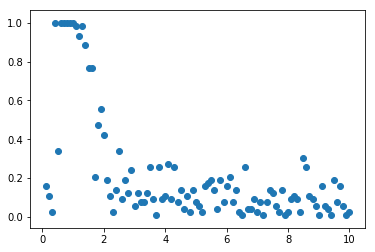

In [153]:
# Lattice Config
w = 11
h = 11

Ts =  np.linspace(0.1, 10, 100)
Gs_list = [MC_honey(np.random.randint(2, size=(w, h))*2-1, T)/(w*h) for T in Ts]
mg_list = [np.abs(np.sum(gs)) for gs in Gs_list]
plt.scatter(Ts, mg_list)
plt.show()